In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os, sys
import pandas as pd
import sklearn
import sklearn.svm, sklearn.discriminant_analysis, sklearn.linear_model
import time

root = '/usr/local/serenceslab/maggie/shapeDim/'

sys.path.append(os.path.join(root, 'Analysis'))
from code_utils import file_utils, data_utils
from code_utils import decoding_utils
from code_utils import stats_utils


In [56]:
ss=1; make_time_resolved=False
_, _, main_labels, roi_names = data_utils.load_main_task_data(ss, make_time_resolved)

In [93]:
xlabs = np.array(main_labels['ptx'])[main_labels['is_main_grid']==True]
ylabs = np.array(main_labels['pty'])[main_labels['is_main_grid']==True]
unx, uny = np.unique(xlabs), np.unique(ylabs)
pt_labs = np.array([xlabs, ylabs]).T
grid_pts, grid_labs, counts = np.unique(pt_labs, axis=0, return_inverse=True, return_counts=True)
grid_pt_strs = np.array(['(%.1f, %.1f)'%(grid_pts[ii,0], grid_pts[ii,1]) for ii in range(len(grid_pts))])
grid_pt_strs

array(['(0.1, 0.1)', '(0.1, 1.7)', '(0.1, 3.3)', '(0.1, 4.9)',
       '(1.7, 0.1)', '(1.7, 1.7)', '(1.7, 3.3)', '(1.7, 4.9)',
       '(3.3, 0.1)', '(3.3, 1.7)', '(3.3, 3.3)', '(3.3, 4.9)',
       '(4.9, 0.1)', '(4.9, 1.7)', '(4.9, 3.3)', '(4.9, 4.9)'],
      dtype='<U10')

In [66]:
save_folder = os.path.join(root, 'Analysis', 'decoding_results')
save_filename = os.path.join(save_folder, 'decode_multiclass_allmaintask.npy')
dec = np.load(save_filename, allow_pickle=True).item()
dec.keys()

dict_keys(['acc_overall', 'dprime_overall', 'acc_each_point', 'dprime_each_point', 'num_preds', 'acc_each_cval', 'best_cval'])

In [116]:
roi_names = ['V1', 'V2', 'V3', 'V3AB', 'hV4', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'LO1', 'LO2']
n_rois = 11
n_subjects = 7
subjects = np.arange(1,8)
subcolors = cm.Dark2(np.linspace(0,1,n_subjects))

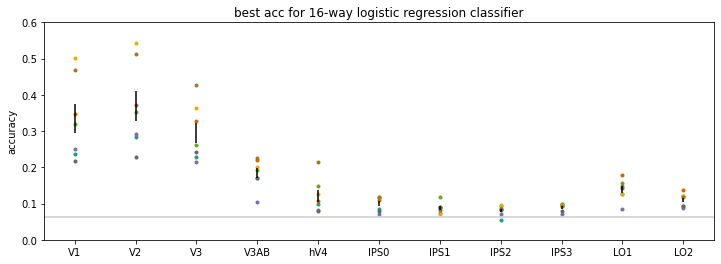

In [158]:
vals = dec['acc_overall']
n_subj = vals.shape[0]
n_rois = vals.shape[1]
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subj)
plt.figure(figsize=(12,4))
plt.errorbar(np.arange(n_rois), meanvals, semvals, linestyle='none',color='k', zorder=10)
for si in range(n_subj):
    plt.plot(np.arange(n_rois), vals[si,:], '.', color=subcolors[si,:])
plt.xticks(np.arange(n_rois), roi_names);
plt.ylim([0, 0.6])
plt.axhline(1/16, color=[0.8, 0.8, 0.8])
plt.ylabel('accuracy')
plt.title('best acc for 16-way logistic regression classifier');

Text(0.5, 1.0, 'V2')

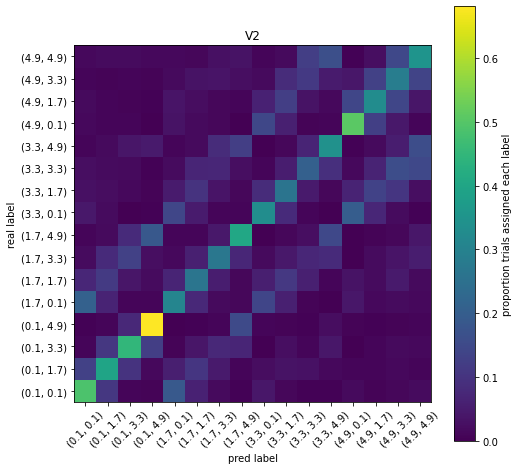

In [125]:
ri = 1;
# sum over subjects
n = np.sum(dec['num_preds'][:,ri,:,:], axis=0)
# sum over all trials with same "real label"
s = np.tile(np.sum(n, axis=1, keepdims=True), [1,n.shape[1]])
prop_conf =  n/s

plt.figure(figsize=(8,8))
plt.pcolormesh(prop_conf)
plt.colorbar(label='proportion trials assigned each label')
plt.ylabel('real label')
plt.xlabel('pred label')
plt.xticks(np.arange(0.5, 16.5, 1.0), grid_pt_strs, rotation=45);
plt.yticks(np.arange(0.5, 16.5, 1.0), grid_pt_strs);
plt.axis('square')
plt.title(roi_names[ri])

Text(0.5, 1.0, 'V2')

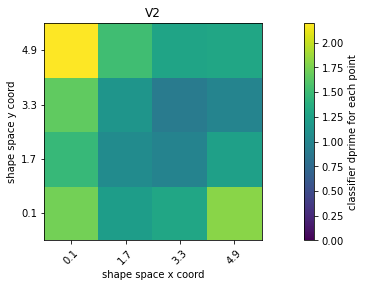

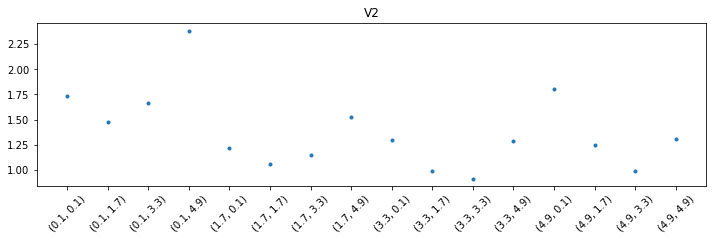

In [123]:
ri = 1

meanvals = np.mean(dec['dprime_each_point'][:,ri,:], axis=0)
meanvals = meanvals.reshape([4,4] , order='C')
plt.figure()
plt.pcolormesh(meanvals.T, vmin=0, vmax=2.2)
plt.colorbar(label='classifier dprime for each point')
plt.ylabel('shape space y coord')
plt.xlabel('shape space x coord')
plt.xticks(np.arange(0.5, 4.5, 1.0), unx, rotation=45);
plt.yticks(np.arange(0.5, 4.5, 1.0), uny);
plt.axis('square')
plt.title(roi_names[ri])

meanvals = np.mean(dec['dprime_each_point'][:,ri,:], axis=0)
plt.figure(figsize=(12,3))
plt.plot(np.arange(16), meanvals,'.')
plt.xticks(np.arange(16), grid_pt_strs, rotation=45)
plt.title(roi_names[ri])

Text(0.5, 1.0, 'V2')

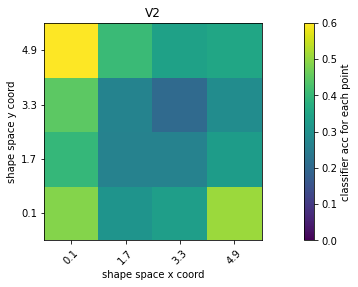

In [124]:
ri = 1

meanvals = np.mean(dec['acc_each_point'][:,ri,:], axis=0)
meanvals = meanvals.reshape([4,4] , order='C')
plt.figure()
plt.pcolormesh(meanvals.T, vmin=0.0, vmax=0.6)
plt.colorbar(label='classifier acc for each point')
plt.ylabel('shape space y coord')
plt.xlabel('shape space x coord')
plt.xticks(np.arange(0.5, 4.5, 1.0), unx, rotation=45);
plt.yticks(np.arange(0.5, 4.5, 1.0), uny);
plt.axis('square')
plt.title(roi_names[ri])


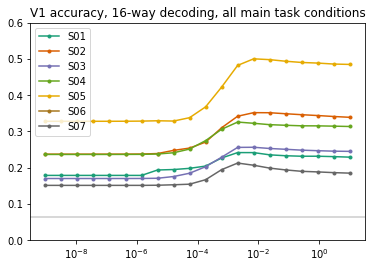

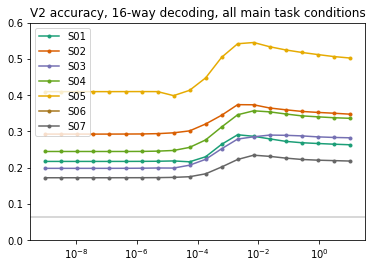

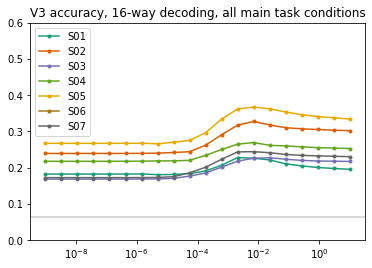

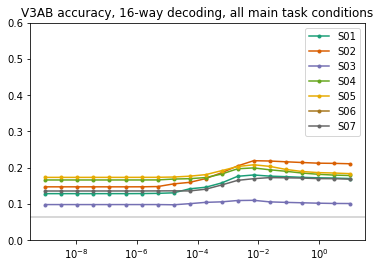

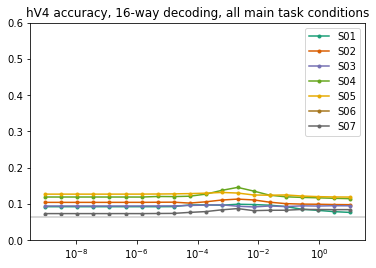

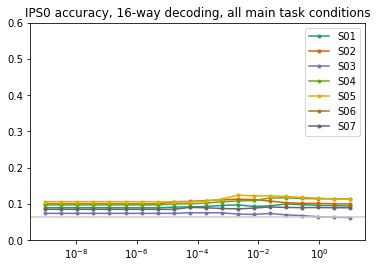

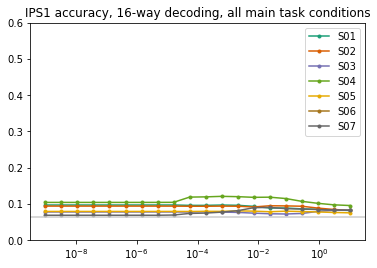

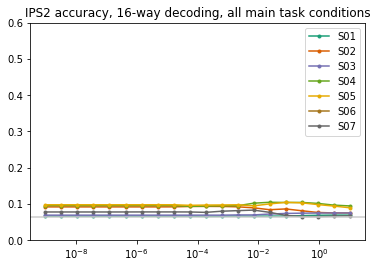

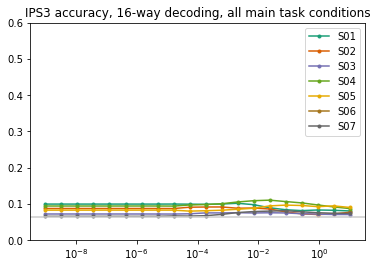

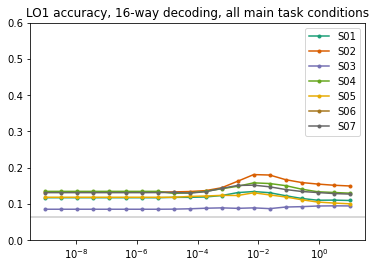

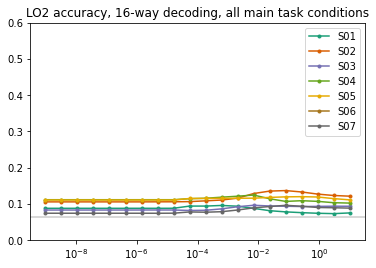

In [40]:
for rr in range(n_rois):

    plt.figure()

    for si in range(n_subjects):

        vals = np.mean(dec['acc_each_cval'][si, rr, :, :], axis=0)

        plt.plot(c_values, vals, '.-', color=subcolors[si,:], )

    plt.gca().set_xscale('log')
    plt.legend(['S%02d'%ss for ss in subjects])

    plt.ylim([0, 0.6])
    plt.axhline(1/16, color=[0.8, 0.8, 0.8])
    plt.title('%s accuracy, 16-way decoding, all main task conditions'%roi_names[rr])